In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

In [2]:
df= pd.read_csv("autoinsurance_churn.csv")

In [3]:
df.head(3)

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0


In [4]:
df.shape

(1680909, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [6]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

acct_suspd_date        88.490989
latitude               15.094154
longitude              15.094154
home_market_value       5.490244
county                  0.717885
city                    0.717885
has_children            0.000000
good_credit             0.000000
college_degree          0.000000
home_owner              0.000000
marital_status          0.000000
length_of_residence     0.000000
individual_id           0.000000
income                  0.000000
address_id              0.000000
state                   0.000000
date_of_birth           0.000000
age_in_years            0.000000
cust_orig_date          0.000000
days_tenure             0.000000
curr_ann_amt            0.000000
Churn                   0.000000
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
    df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [9]:
#ProfileReport(df)

In [10]:
df.drop(['individual_id', 'address_id','date_of_birth','acct_suspd_date','curr_ann_amt', "cust_orig_date"],axis=1,inplace=True)

In [11]:
df

,days_tenure,age_in_years,latitude,longitude,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,1454.0,44,32.578829,-96.305006,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,0
1,1795.0,72,32.732209,-97.000893,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,0
2,4818.0,55,32.819777,-96.846938,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,0
3,130.0,53,32.684065,-97.162180,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,1
4,5896.0,50,32.751398,-97.376745,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,803.0,55,32.678483,-96.665119,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,0
1680905,3261.0,77,32.972007,-96.688905,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,0
1680906,3403.0,41,32.902815,-96.510684,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,0
1680907,1258.0,52,32.892940,-97.245317,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,0


In [12]:
len(df["home_market_value"].value_counts())

19

In [13]:
df[["home_market_value"]]

,home_market_value
0,50000 - 74999
1,50000 - 74999
2,75000 - 99999
3,175000 - 199999
4,225000 - 249999
...,...
1680904,50000 - 74999
1680905,125000 - 149999
1680906,125000 - 149999
1680907,75000 - 99999


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(1409511, 16)

In [16]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

days_tenure            0.0
age_in_years           0.0
latitude               0.0
longitude              0.0
city                   0.0
state                  0.0
county                 0.0
income                 0.0
has_children           0.0
length_of_residence    0.0
marital_status         0.0
home_market_value      0.0
home_owner             0.0
college_degree         0.0
good_credit            0.0
Churn                  0.0
dtype: float64

In [17]:
df.drop("home_market_value", axis=1, inplace=True)

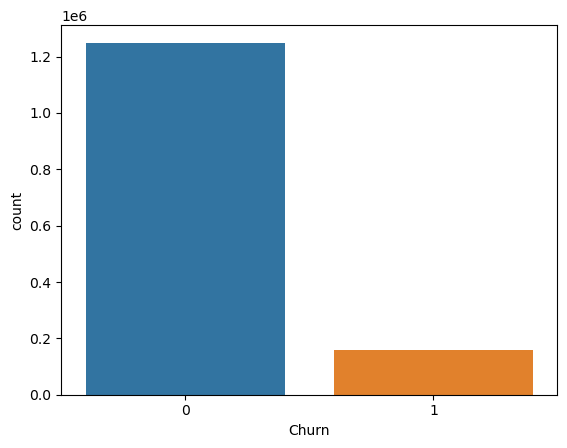

In [56]:
import seaborn as sns
sns.countplot(data= df, x = 'Churn')
plt.show()

In [18]:
df

,days_tenure,age_in_years,latitude,longitude,city,state,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn
0,1454.0,44,32.578829,-96.305006,Kaufman,TX,Kaufman,22500.0,1.0,15.0,Married,1.0,1.0,1.0,0
1,1795.0,72,32.732209,-97.000893,Grand Prairie,TX,Dallas,27500.0,0.0,2.0,Single,1.0,0.0,0.0,0
2,4818.0,55,32.819777,-96.846938,Dallas,TX,Dallas,42500.0,0.0,10.0,Married,1.0,0.0,0.0,0
3,130.0,53,32.684065,-97.162180,Arlington,TX,Tarrant,125000.0,1.0,6.0,Married,1.0,0.0,1.0,1
4,5896.0,50,32.751398,-97.376745,Fort Worth,TX,Tarrant,87500.0,1.0,4.0,Married,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,803.0,55,32.678483,-96.665119,Dallas,TX,Dallas,27500.0,1.0,3.0,Single,1.0,0.0,1.0,0
1680905,3261.0,77,32.972007,-96.688905,Richardson,TX,Dallas,87500.0,0.0,1.0,Married,1.0,0.0,1.0,0
1680906,3403.0,41,32.902815,-96.510684,Rowlett,TX,Dallas,125000.0,0.0,12.0,Married,1.0,1.0,1.0,0
1680907,1258.0,52,32.892940,-97.245317,Keller,TX,Tarrant,87500.0,1.0,11.0,Single,1.0,1.0,1.0,0


In [19]:
#for categorical Columns in a dataset
categorical_columns = df.select_dtypes(exclude='number').columns
categorical_columns

Index(['city', 'state', 'county', 'marital_status'], dtype='object')

In [20]:
#sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [21]:
df[["county"]].value_counts()

county  
Dallas      513159
Tarrant     420260
Collin      181170
Denton      156843
Ellis        39663
Kaufman      29008
Parker       22041
Johnson      21748
Rockwall     21546
Hunt          1599
Cooke         1480
Navarro        528
Grayson        398
Hill            68
Name: count, dtype: int64

In [22]:
len(df[["county"]].value_counts())

14

In [23]:
drop= ["Hill"]
df = df[~df["county"].isin(drop)]

In [24]:
df[["county"]].value_counts()

county  
Dallas      513159
Tarrant     420260
Collin      181170
Denton      156843
Ellis        39663
Kaufman      29008
Parker       22041
Johnson      21748
Rockwall     21546
Hunt          1599
Cooke         1480
Navarro        528
Grayson        398
Name: count, dtype: int64

In [25]:
df[["state"]].value_counts()

state
TX       1409443
Name: count, dtype: int64

In [26]:
df.drop(["state"],axis=1,inplace=True)

C:\Users\AS\AppData\Local\Temp\ipykernel_9252\3559175806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["state"],axis=1,inplace=True)


In [27]:
df

,days_tenure,age_in_years,latitude,longitude,city,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn
0,1454.0,44,32.578829,-96.305006,Kaufman,Kaufman,22500.0,1.0,15.0,Married,1.0,1.0,1.0,0
1,1795.0,72,32.732209,-97.000893,Grand Prairie,Dallas,27500.0,0.0,2.0,Single,1.0,0.0,0.0,0
2,4818.0,55,32.819777,-96.846938,Dallas,Dallas,42500.0,0.0,10.0,Married,1.0,0.0,0.0,0
3,130.0,53,32.684065,-97.162180,Arlington,Tarrant,125000.0,1.0,6.0,Married,1.0,0.0,1.0,1
4,5896.0,50,32.751398,-97.376745,Fort Worth,Tarrant,87500.0,1.0,4.0,Married,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,803.0,55,32.678483,-96.665119,Dallas,Dallas,27500.0,1.0,3.0,Single,1.0,0.0,1.0,0
1680905,3261.0,77,32.972007,-96.688905,Richardson,Dallas,87500.0,0.0,1.0,Married,1.0,0.0,1.0,0
1680906,3403.0,41,32.902815,-96.510684,Rowlett,Dallas,125000.0,0.0,12.0,Married,1.0,1.0,1.0,0
1680907,1258.0,52,32.892940,-97.245317,Keller,Tarrant,87500.0,1.0,11.0,Single,1.0,1.0,1.0,0


In [28]:
df[["marital_status"]].value_counts()

marital_status
Married           928480
Single            480963
Name: count, dtype: int64

In [29]:
df.columns

Index(['days_tenure', 'age_in_years', 'latitude', 'longitude', 'city',
       'county', 'income', 'has_children', 'length_of_residence',
       'marital_status', 'home_owner', 'college_degree', 'good_credit',
       'Churn'],
      dtype='object')

In [30]:
df.shape

(1409443, 14)

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['city', 'county', 'marital_status']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
 
#alalternative way
#df[['city', 'county', 'marital_status']] = endcoder.fit_transform(df[['city', 'county', 'marital_status']])

C:\Users\AS\AppData\Local\Temp\ipykernel_9252\4283981166.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
C:\Users\AS\AppData\Local\Temp\ipykernel_9252\4283981166.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
C:\Users\AS\AppData\Local\Temp\ipykernel_9252\4283981166.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [32]:
df

,days_tenure,age_in_years,latitude,longitude,city,county,income,has_children,length_of_residence,marital_status,home_owner,college_degree,good_credit,Churn
0,1454.0,44,32.578829,-96.305006,46,8,22500.0,1.0,15.0,0,1.0,1.0,1.0,0
1,1795.0,72,32.732209,-97.000893,36,2,27500.0,0.0,2.0,1,1.0,0.0,0.0,0
2,4818.0,55,32.819777,-96.846938,21,2,42500.0,0.0,10.0,0,1.0,0.0,0.0,0
3,130.0,53,32.684065,-97.162180,5,12,125000.0,1.0,6.0,0,1.0,0.0,1.0,1
4,5896.0,50,32.751398,-97.376745,33,12,87500.0,1.0,4.0,0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,803.0,55,32.678483,-96.665119,21,2,27500.0,1.0,3.0,1,1.0,0.0,1.0,0
1680905,3261.0,77,32.972007,-96.688905,74,2,87500.0,0.0,1.0,0,1.0,0.0,1.0,0
1680906,3403.0,41,32.902815,-96.510684,77,2,125000.0,0.0,12.0,0,1.0,1.0,1.0,0
1680907,1258.0,52,32.892940,-97.245317,47,12,87500.0,1.0,11.0,1,1.0,1.0,1.0,0


In [33]:
categorical_columns = df.select_dtypes(exclude='number').columns
categorical_columns

Index([], dtype='object')

In [34]:
X= df.drop("Churn",axis=1)
y= df["Churn"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True, stratify=y)

In [36]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (1057082, 13) & shape of y_train (1057082,)
shape of X_test (352361, 13) & shape of y_test (352361,)


In [37]:
from sklearn.preprocessing import StandardScaler
#sklearn preprocessing
standard_scaler = StandardScaler() #z-score
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)


In [38]:
X_train

array([[-1.51559859, -0.08456862,  1.26563689, ...,  0.32519125,
        -0.75166136,  0.40673204],
       [ 1.13318223, -0.01471427, -0.7250693 , ...,  0.32519125,
        -0.75166136,  0.40673204],
       [-0.84604685, -0.57354907, -0.6405049 , ...,  0.32519125,
        -0.75166136, -2.45862118],
       ...,
       [-0.17990683, -0.08456862,  1.69684567, ...,  0.32519125,
        -0.75166136,  0.40673204],
       [ 0.19666272, -0.43384037, -0.63067903, ...,  0.32519125,
        -0.75166136,  0.40673204],
       [-0.00846746, -0.08456862,  1.28530926, ...,  0.32519125,
         1.33038633,  0.40673204]])

In [39]:
X_test

array([[ 1.13253686,  2.21476739, -0.46819622, ...,  0.32576519,
        -0.75063312,  0.40769325],
       [ 1.13253686, -0.50467999,  0.48147421, ...,  0.32576519,
        -0.75063312,  0.40769325],
       [-1.48991477, -0.01657405, -0.23674376, ...,  0.32576519,
        -0.75063312, -2.45282451],
       ...,
       [ 1.12059919,  0.33207305, -0.05538672, ...,  0.32576519,
         1.33220873,  0.40769325],
       [ 1.13253686,  0.26234363, -0.27801183, ...,  0.32576519,
        -0.75063312,  0.40769325],
       [-0.00324775, -0.71386825,  1.09995456, ...,  0.32576519,
        -0.75063312,  0.40769325]])

https://chat.openai.com/share/cd7abbe7-c427-45a3-8918-85230eb7612f

# Machine Learning

In [40]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import xgboost as xgb

In [42]:
reg = xgb.XGBClassifier(learning_rate= 0.009, max_depth= 3, min_child_weight= 1, n_estimators =390) #for binary classification
reg.fit(X_train, y_train) #training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.009, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=390, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred = reg.predict(X_test)

# Evaluation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
    accuracy_score(y_test, y_pred)

0.885918135094406

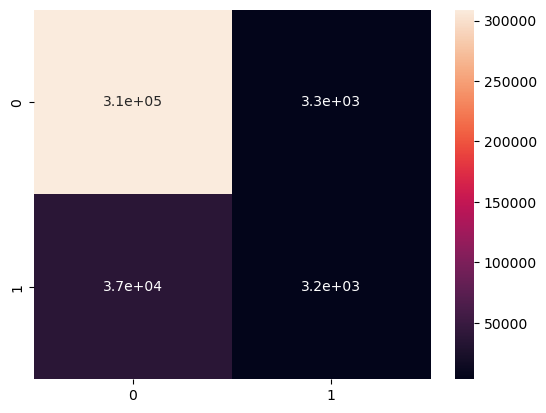

In [46]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [47]:
confusion_matrix(y_test, y_pred)

array([[308986,   3317],
       [ 36881,   3177]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    312303
           1       0.49      0.08      0.14     40058

    accuracy                           0.89    352361
   macro avg       0.69      0.53      0.54    352361
weighted avg       0.85      0.89      0.85    352361



In [49]:
import lightgbm as light

In [50]:
gbm = light.LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 120173, number of negative: 936909
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 1057082, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113684 -> initscore=-2.053654
[LightGBM] [Info] Start training from score -2.053654


In [51]:
prediction= gbm.predict(X_test)

In [52]:
LightGBM

0.8860713870150215

In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94    312303
           1       0.50      0.19      0.28     40058

    accuracy                           0.89    352361
   macro avg       0.70      0.58      0.61    352361
weighted avg       0.86      0.89      0.86    352361



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gradient = GradientBoostingClassifier(n_jobs=-1).fit(X_train, y_train)

In [59]:
preddd = gradient.predict(X_test)

In [61]:
confusion_matrix(y_test, preddd)

array([[304421,   7882],
       [ 32279,   7779]], dtype=int64)

In [62]:
print(classification_report(y_test, preddd))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94    312303
           1       0.50      0.19      0.28     40058

    accuracy                           0.89    352361
   macro avg       0.70      0.58      0.61    352361
weighted avg       0.86      0.89      0.86    352361



In [63]:
accuracy_score(y_test, preddd)

0.8860231410400129